In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score # AUC ROC
from sklearn.metrics import average_precision_score # AUC PRC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [5]:
train = pd.read_excel(r"C:\Users\jiyal\OneDrive\Desktop\JIYA data science\Sem III\tableau\Tableau final data\loan\Final analysis\Training Data.xlsx")
test = pd.read_excel(r"C:\Users\jiyal\OneDrive\Desktop\JIYA data science\Sem III\tableau\Tableau final data\loan\Final analysis\Test Data.xlsx")

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


In [7]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,28000.0,1.400050e+04,8.083048e+03,1.0,7000.75,14000.5,21000.25,28000.0
Income,28000.0,5.029563e+06,2.864938e+06,10310.0,2545414.00,5046744.0,7474639.00,9999814.0
Age,28000.0,5.005468e+01,1.712988e+01,21.0,35.00,50.0,65.00,79.0
Experience,28000.0,1.012039e+01,6.027317e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,28000.0,6.339286e+00,3.645222e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,28000.0,1.199179e+01,1.397754e+00,10.0,11.00,12.0,13.00,14.0


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Income             252000 non-null  int64
 1   Age                252000 non-null  int64
 2   Experience         252000 non-null  int64
 3   Married/Single     252000 non-null  int32
 4   House_Ownership    252000 non-null  int32
 5   Car_Ownership      252000 non-null  int32
 6   Profession         252000 non-null  int32
 7   CITY               252000 non-null  int32
 8   STATE              252000 non-null  int32
 9   CURRENT_JOB_YRS    252000 non-null  int64
 10  CURRENT_HOUSE_YRS  252000 non-null  int64
 11  Risk_Flag          252000 non-null  int64
dtypes: int32(6), int64(6)
memory usage: 17.3 MB


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 28000 non-null  float64
 1   Income             28000 non-null  float64
 2   Age                28000 non-null  float64
 3   Experience         28000 non-null  float64
 4   Married/Single     28000 non-null  object 
 5   House_Ownership    28000 non-null  object 
 6   Car_Ownership      28000 non-null  object 
 7   Profession         28000 non-null  object 
 8   CITY               28000 non-null  object 
 9   STATE              28000 non-null  object 
 10  CURRENT_JOB_YRS    28000 non-null  float64
 11  CURRENT_HOUSE_YRS  28000 non-null  float64
dtypes: float64(6), object(6)
memory usage: 2.6+ MB


In [49]:
train.CITY.sort_values().unique() == test.CITY.sort_values().unique()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [50]:
test.STATE.sort_values().unique()

array(['Andhra_Pradesh', 'Assam', 'Berhampore', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Gujarat', 'Haryana', 'Himachal_Pradesh',
       'Jammu_and_Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Mizoram', 'Nandyal',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil_Nadu', 'Telangana', 'Tripura', 'Uttar_Pradesh',
       'Uttar_Pradesh[5]', 'Uttarakhand', 'West_Bengal'], dtype=object)

In [51]:
train.STATE.sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [13]:
test.CITY = test.CITY.apply(lambda x: x.replace(" ","_")) 


In [14]:

train.CITY.sort_values().unique() == test.CITY.sort_values().unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [15]:
features = ["Married/Single","House_Ownership","Car_Ownership","Profession","CITY","STATE"]
label_encoder = LabelEncoder()

for col in features:
    train[col] = label_encoder.fit_transform(train[col])

In [16]:
train.drop("Id", axis=1, inplace=True)

In [17]:
train 

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,6507128,45,0,1,2,0,27,233,18,0,10,0


In [18]:
X = train.drop('Risk_Flag',axis=1)
y = train['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 101)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [39]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[40406  3795]
 [ 1454  4745]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     44201
           1       0.56      0.77      0.64      6199

    accuracy                           0.90     50400
   macro avg       0.76      0.84      0.79     50400
weighted avg       0.91      0.90      0.90     50400


Train_Set
[[161815  14988]
 [     4  24793]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    176803
           1       0.62      1.00      0.77     24797

    accuracy                           0.93    201600
   macro avg       0.81      0.96      0.86    201600
weighted avg       0.95      0.93      0.93    201600



[Text(0.5, 33.0, 'Predicted Class'), Text(69.0, 0.5, 'Actual Class')]

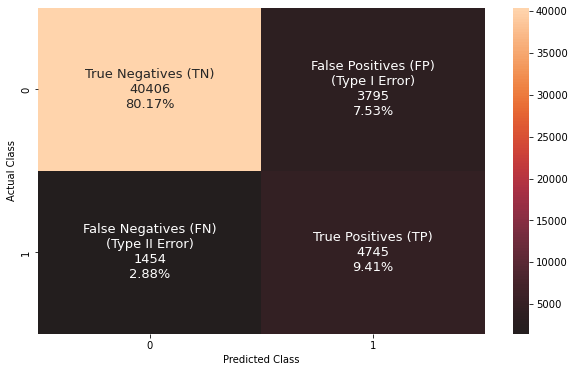

In [40]:
plt.figure(figsize=(10,6))

y_pred = rf_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, center=1)
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class')


C:\Users\jiyal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


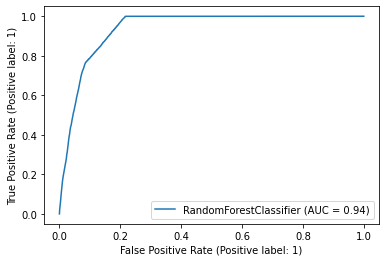

In [23]:
plot_roc_curve(rf_model, X_test, y_test);


C:\Users\jiyal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


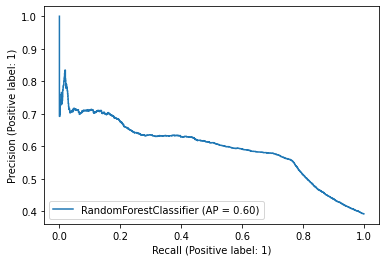

In [24]:
plot_precision_recall_curve(rf_model, X_test, y_test);

In [25]:
from sklearn.utils import class_weight

In [26]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.57012607, 0.57012607, 0.57012607, ..., 0.57012607, 0.57012607,
       0.57012607])

In [27]:
rf_model = RandomForestClassifier(random_state=101, max_depth=12, n_estimators= 200, min_samples_split = 3)
rf_model.fit(X_train,y_train ,sample_weight=classes_weights)
eval_metric(rf_model, X_train, y_train, X_test, y_test)


Test_Set
[[39000  5201]
 [ 1560  4639]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     44201
           1       0.47      0.75      0.58      6199

    accuracy                           0.87     50400
   macro avg       0.72      0.82      0.75     50400
weighted avg       0.90      0.87      0.88     50400


Train_Set
[[156966  19837]
 [  4301  20496]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93    176803
           1       0.51      0.83      0.63     24797

    accuracy                           0.88    201600
   macro avg       0.74      0.86      0.78    201600
weighted avg       0.92      0.88      0.89    201600



C:\Users\jiyal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


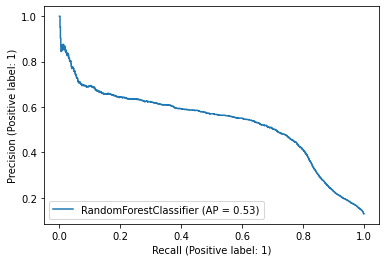

In [28]:
plot_precision_recall_curve(rf_model, X_test, y_test);

C:\Users\jiyal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


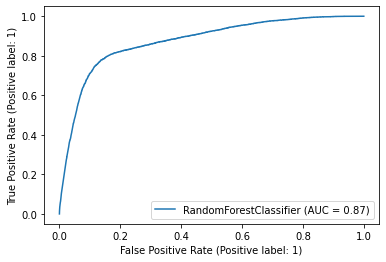

In [29]:
plot_roc_curve(rf_model, X_test, y_test);

In [30]:
gr_rf_model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=12, n_estimators= 200, min_samples_split = 3 )
gr_rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=3, n_estimators=200, random_state=101)

In [31]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = gr_rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
Income,0.183432
CITY,0.161153
Profession,0.140919
Age,0.140747
STATE,0.101463
Experience,0.082595
CURRENT_JOB_YRS,0.077048
CURRENT_HOUSE_YRS,0.058347
Car_Ownership,0.020258
House_Ownership,0.019421


In [32]:
rf_feature_imp.to_excel("./rf importance.xlsx")

In [33]:
rf_feature_imp

,Feature Importance
Income,0.183432
CITY,0.161153
Profession,0.140919
Age,0.140747
STATE,0.101463
Experience,0.082595
CURRENT_JOB_YRS,0.077048
CURRENT_HOUSE_YRS,0.058347
Car_Ownership,0.020258
House_Ownership,0.019421


In [34]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.896632
test_precision    0.558237
test_recall       0.765052
test_f1           0.645472
dtype: float64